## Importando Bibliotecas

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Carregando dados

In [113]:
df = pd.read_csv('data/train.csv')

In [114]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


## Valores NA's

In [115]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           1
Time_taken(min)                1
dtype: int64

In [116]:
# Função para verificar se um valor é igual a 'NaN '
def find_NAN(value):
    return value == 'NaN '

# Aplica a função a cada célula do DataFrame
result = df.applymap(find_NAN)

result.sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            189
Delivery_person_Ratings        195
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    179
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density            67
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            104
Festival                        20
City                           129
Time_taken(min)                  0
dtype: int64

In [117]:
# Removendo as celulas que tem valor como 'NaN ' de Delivery_person_Age

linhas_NAs = (df.Delivery_person_Age != 'NaN ') & (df.Delivery_person_Ratings != 'NaN ') & (df.Time_Orderd != 'NaN ') & (df.Road_traffic_density != 'NaN ') & (df.multiple_deliveries != 'NaN ') & (df.Festival != 'NaN ') & (df.City != 'NaN ')

df = df.loc[linhas_NAs,:]

In [118]:
# Verificando se todos foram removidos

result = df.applymap(find_NAN)

result.sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

## Data Types

In [119]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4029 entries, 0 to 4466
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4029 non-null   object 
 1   Delivery_person_ID           4029 non-null   object 
 2   Delivery_person_Age          4029 non-null   object 
 3   Delivery_person_Ratings      4029 non-null   object 
 4   Restaurant_latitude          4029 non-null   float64
 5   Restaurant_longitude         4029 non-null   float64
 6   Delivery_location_latitude   4029 non-null   float64
 7   Delivery_location_longitude  4029 non-null   float64
 8   Order_Date                   4029 non-null   object 
 9   Time_Orderd                  4029 non-null   object 
 10  Time_Order_picked            4029 non-null   object 
 11  Weatherconditions            4029 non-null   object 
 12  Road_traffic_density         4029 non-null   object 
 13  Vehicle_condition      

## Manipulação dos dados

In [121]:
df1 = df.copy()
# 1. Convertendo a coluna Age de texto para numero
df1.Delivery_person_Age = df1.Delivery_person_Age.astype(int)

# 2. Convertendo a coluna Delivery_person_Ratings de texto para numero
df1.Delivery_person_Ratings = df1.Delivery_person_Ratings.astype(float)

# 3. Convertendo a coluna Order_Date de texto para data

df1.Order_Date = pd.to_datetime(df1.Order_Date, format='%d-%m-%Y')

# 4. Convertendo a coluna multiple_deliveries de texto para numero

df1.multiple_deliveries = df1.multiple_deliveries.astype(int)

# 5. Removendo os espacos dentro de strings/texto/object

df1.loc[:, 'ID'] = df1.loc[:, 'ID'].str.strip()
df1.loc[:, 'Road_traffic_density'] = df1.loc[:, 'Road_traffic_density'].str.strip()
df1.loc[:, 'Type_of_order'] = df1.loc[:, 'Type_of_order'].str.strip()
df1.loc[:, 'Type_of_vehicle'] = df1.loc[:, 'Type_of_vehicle'].str.strip()
df1.loc[:, 'City'] = df1.loc[:, 'City'].str.strip()
df1.loc[:, 'Festival'] = df1.loc[:, 'Festival'].str.strip()

# 6. Limpando a coluna de time taken

# df1['Time_taken(min)'] = df1['Time_taken(min)'].apply( lambda x: x.split( '(min) ')[1] )

# 7. Criando uma coluna 'week_year' (Semana do Ano) a partir da coluna Order_date
df1['week_year'] = df1.Order_Date.dt.strftime('%U')
df1.week_year = df1.week_year.astype(int)

In [122]:
df1.dtypes

ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                     int32
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                     datetime64[ns]
Time_Orderd                            object
Time_Order_picked                      object
Weatherconditions                      object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                     int32
Festival                               object
City                                   object
Time_taken(min)                        object
week_year                               int32
dtype: object

Duvidas: Time_Orderd, Time_Order_picked - Tipo de dados de tempo/hora
         Como converter a coluna time taken (min)

## Análises dos Dados

In [123]:
df1.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),week_year
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,11
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,12


### Visão: Empresa

#### 1. Quantidade de pedidos por dia

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



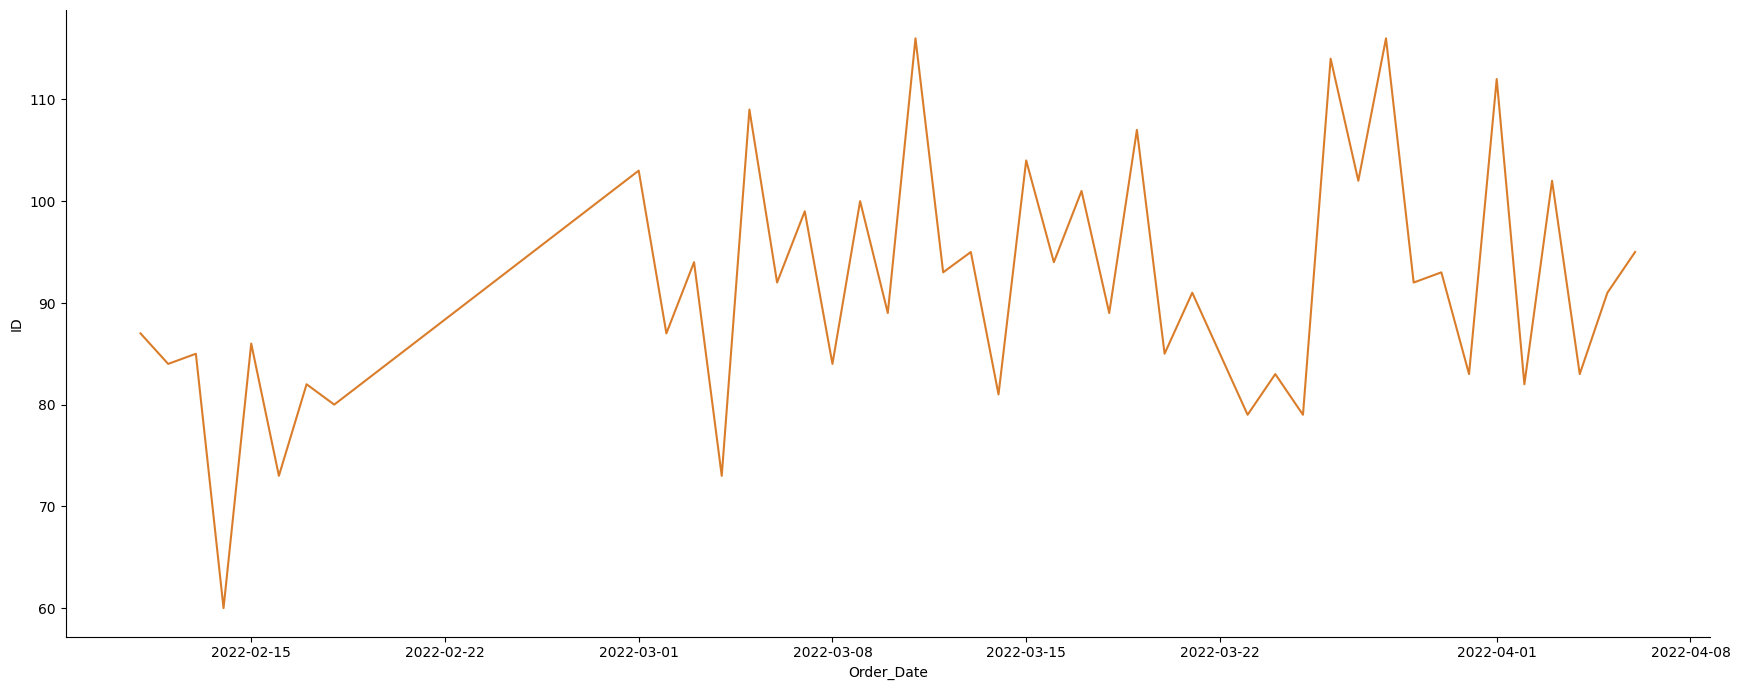

In [124]:
cols  = ['ID','Order_Date']

task1 = df1.loc[:,cols].groupby('Order_Date').count().reset_index().sort_values('Order_Date')
task1

# Grafico Seaborn
sns.relplot(x='Order_Date', y='ID', data=task1, kind='line',aspect=2.5, height=7)


# Grafico Plotly
px.line(task1, x='Order_Date', y='ID')

#### 2. Quantidade de pedidos por semana.


c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



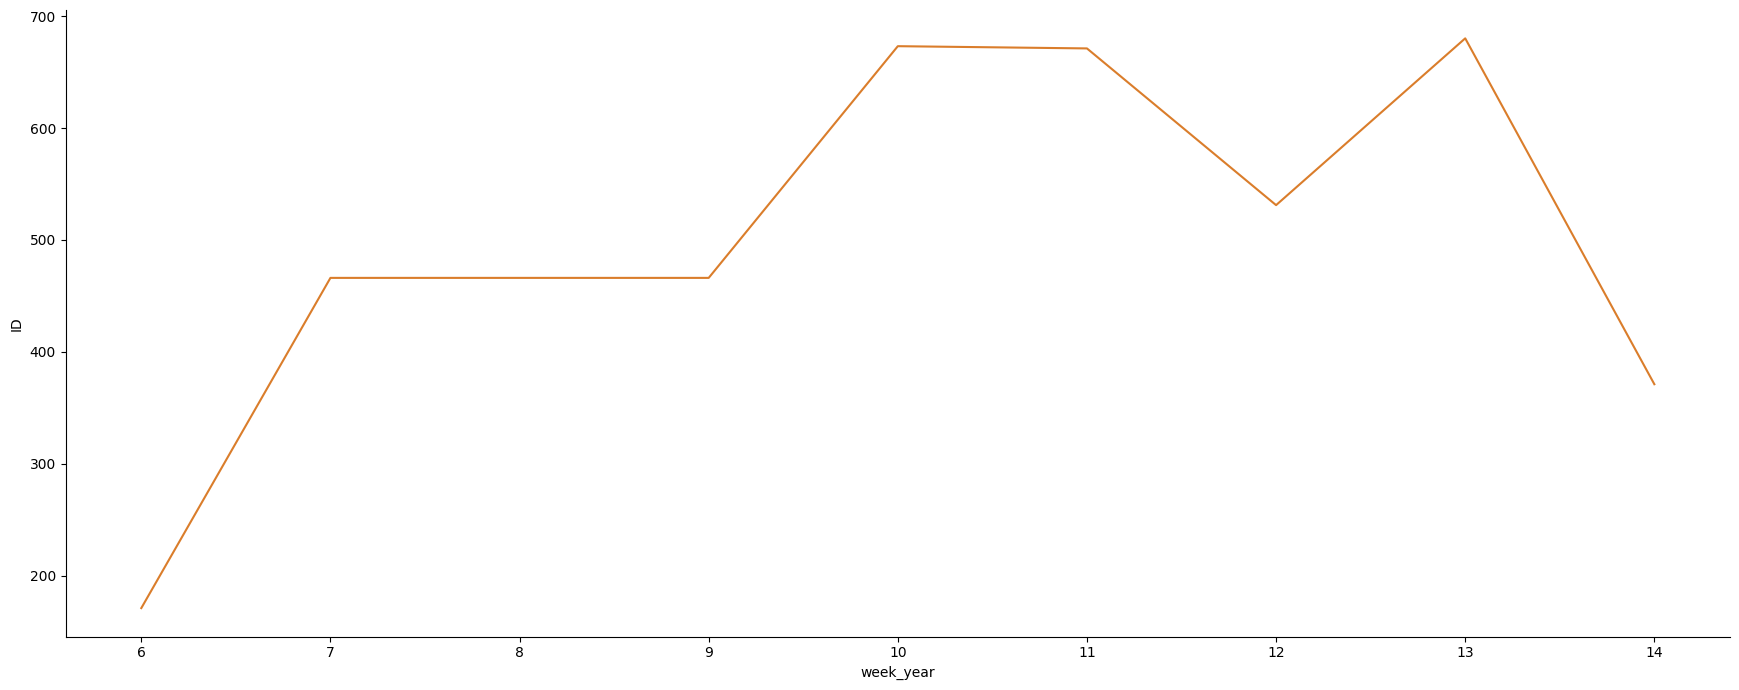

In [125]:
cols = ['ID', 'week_year']

task2 = df1.loc[:,cols].groupby('week_year').count().reset_index().sort_values('week_year')

# Grafico Seaborn
sns.relplot(x='week_year', y='ID', data=task2, kind='line',aspect=2.5, height=7)


# Grafico Plotly
px.line(task2, x='week_year', y='ID')

#### 3. Distribuição dos pedidos por tipo de tráfego.

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



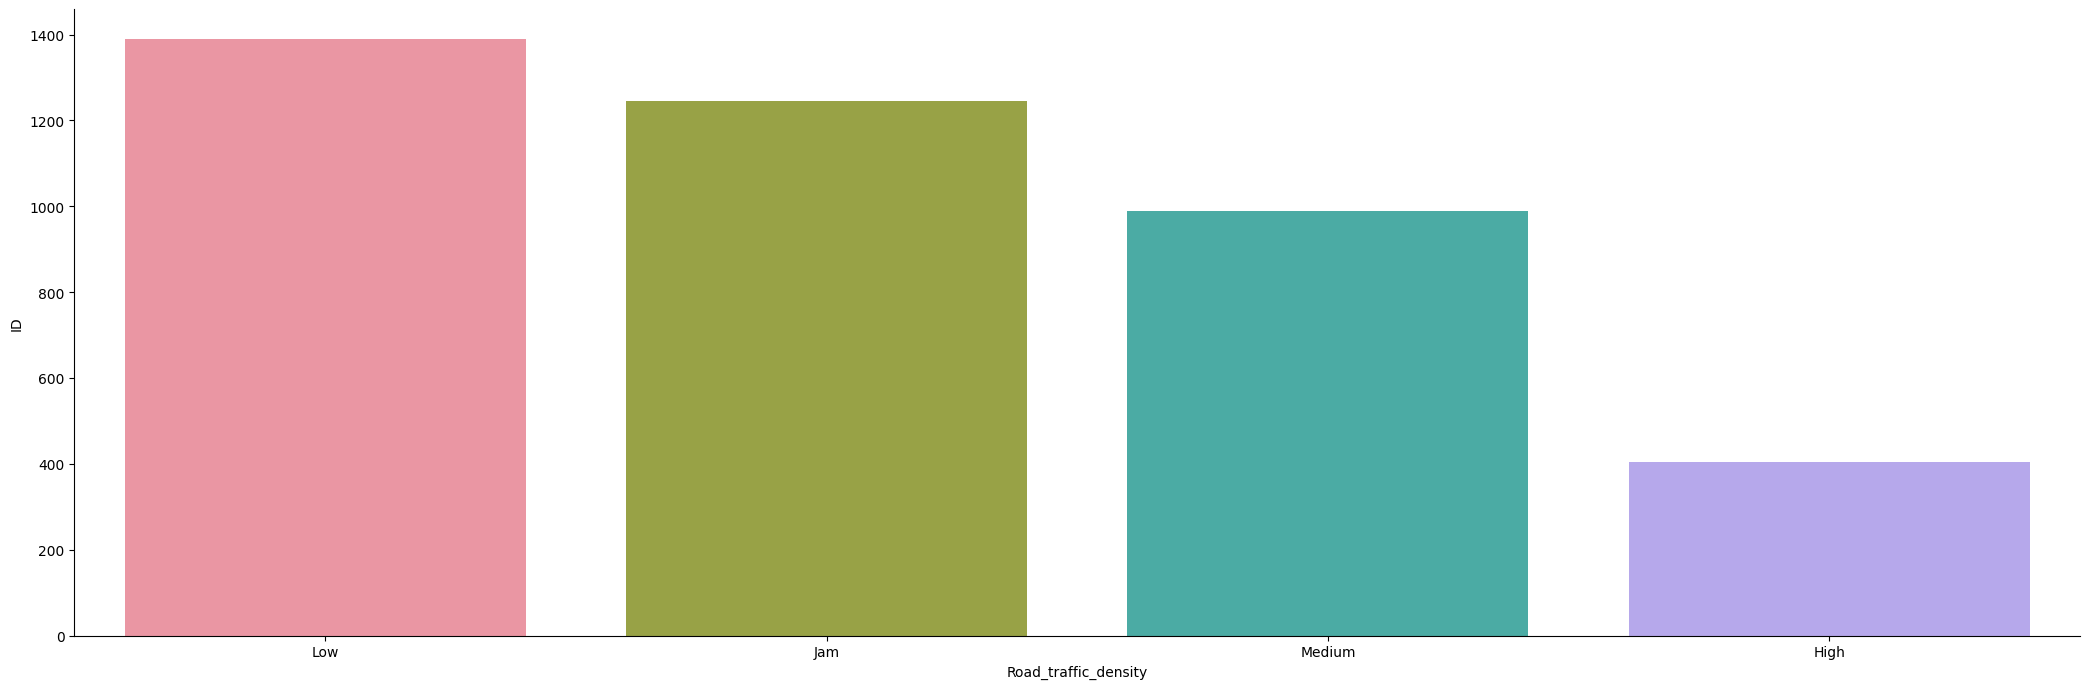

In [126]:
cols = ['ID', 'Road_traffic_density']

task3 =df1.loc[:,cols].groupby(['Road_traffic_density']).count().sort_values('ID', ascending=False).reset_index()

# Grafico Seaborn
sns.catplot(x='Road_traffic_density', y='ID',data=task3, aspect=3,height=7, kind='bar')

#Grafico Plotly 
px.bar(task3,x='Road_traffic_density', y='ID')

#### 4. Comparação do volume de pedidos por cidade e tipo de tráfego.

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



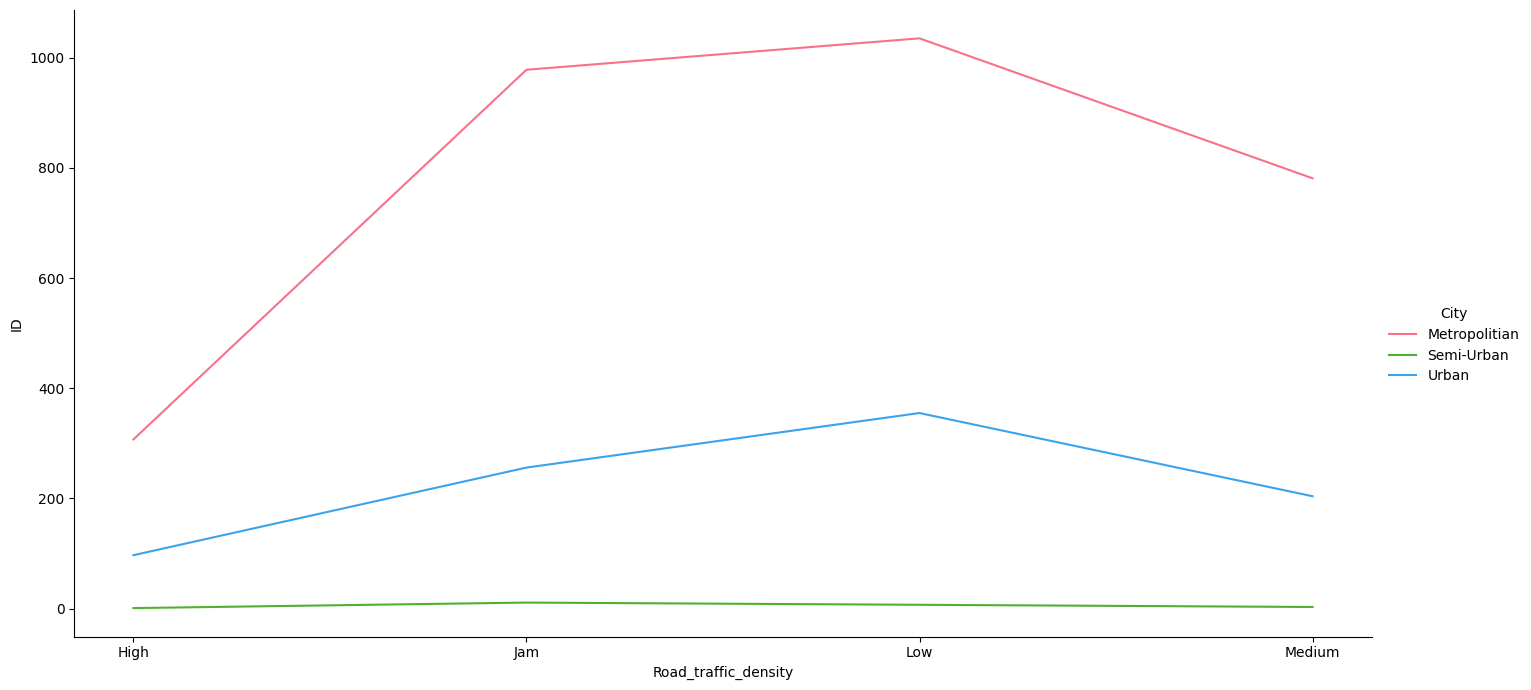

In [127]:
cols = ['ID', 'City', 'Road_traffic_density']

task4 = df1.loc[:,cols].groupby(['City','Road_traffic_density']).count().reset_index()
task4


# healthexp = sns.load_dataset("task4").sort_values("Year")
sns.relplot(data=task4, kind="line",x="Road_traffic_density", y="ID", hue="City",sort=False,height=7, aspect=2)

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



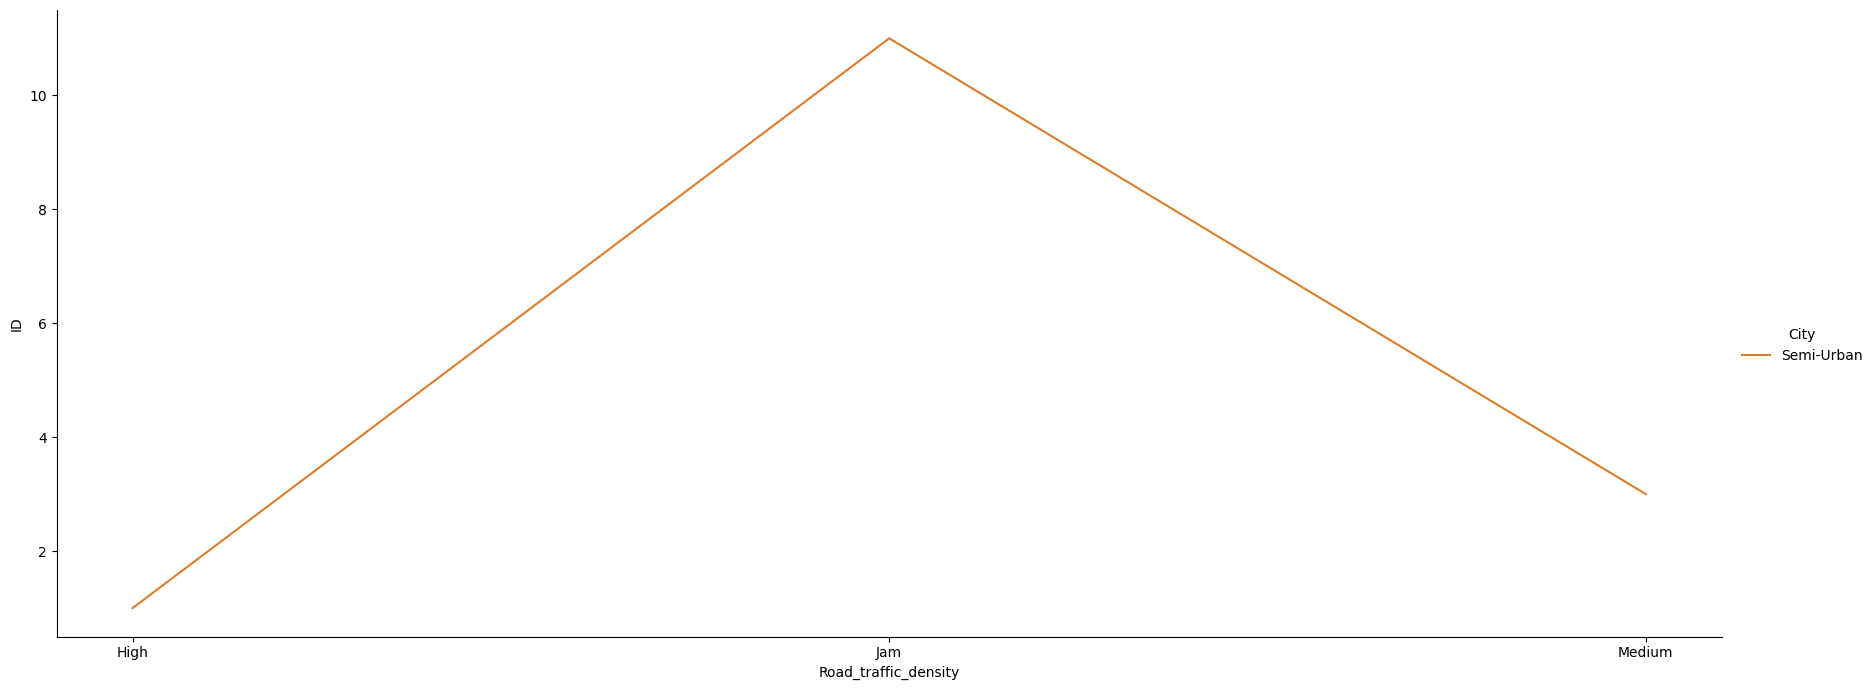

In [128]:
# Visualizado entregas do meio Semi-Urban
task41 = task4.loc[task4['City'] == 'Semi-Urban', :]
sns.set_palette(['#DA7D2B'])

sns.relplot(task41, kind='line', x='Road_traffic_density', y='ID', hue="City", aspect=2.5, height=7)

#### 5. A quantidade de pedidos por entregador por semana.

In [141]:
#Quantidade de pedidos por semana
df_aux1 =df1.loc[:,['ID','week_year']].groupby('week_year').count().reset_index()

#Quantidade de entregadores por semana
df1_aux2 = df1.loc[:,['Delivery_person_ID', 'week_year']].groupby('week_year').nunique().reset_index()

df_aux = pd.merge(df_aux1,df1_aux2,how='inner',on='week_year')

df_aux['order_by_deliver'] = df_aux['ID']/df_aux['Delivery_person_ID']

px.line(df_aux, x='week_year',y='order_by_deliver')

#### 6. A localização central de cada cidade por tipo de tráfego.

In [145]:
# !pip install folium

In [149]:
import folium 

df_aux = df1.loc[:,['City', 'Road_traffic_density', 'Delivery_location_latitude','Delivery_location_longitude']].groupby(['City','Road_traffic_density']).median().reset_index()

map = folium.Map()

for index, location_info in df_aux.iterrows():
    folium.Marker([location_info['Delivery_location_latitude'],
                   location_info['Delivery_location_longitude']],
                   popup=location_info[['City','Road_traffic_density']]).add_to(map)
    
map

### Visão: Entregadores

In [151]:
df1.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),week_year
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,11
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,12


#### 1. A menor e maior idade dos entregadores.

In [153]:
print(f'A menor idade dos entregadores: {df1.Delivery_person_Age.min()}')
print(f'A maior idade dos entregadores: {df1.Delivery_person_Age.max()}')

A menor idade dos entregadores: 20
A maior idade dos entregadores: 39


#### 2. A pior e a melhor condição de veículos.


In [155]:
# 0: Ruim, 1: Mediano e 2: Bom
df1.Vehicle_condition.unique()

array([2, 0, 1], dtype=int64)

#### 3. A avaliação média por entregador.

In [198]:
cols = ['Delivery_person_ID','Delivery_person_Ratings']
print('Media mais altas dos entregadores')
print(df1.loc[:,cols].groupby('Delivery_person_ID').mean().sort_values('Delivery_person_Ratings', ascending=False).head())

print('\n')
print('Medias mais baixas dos entregadores')
print(df1.loc[:,cols].groupby('Delivery_person_ID').mean().sort_values('Delivery_person_Ratings', ascending=False).tail())

Media mais altas dos entregadores
                    Delivery_person_Ratings
Delivery_person_ID                         
BHPRES17DEL01                           5.0
GOARES05DEL03                           5.0
AGRRES15DEL03                           5.0
GOARES14DEL01                           5.0
COIMBRES08DEL02                         5.0


Medias mais baixas dos entregadores
                    Delivery_person_Ratings
Delivery_person_ID                         
VADRES18DEL03                           3.5
LUDHRES010DEL02                         3.5
ALHRES01DEL03                           3.1
GOARES03DEL02                           2.6
LUDHRES20DEL01                          2.6


c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



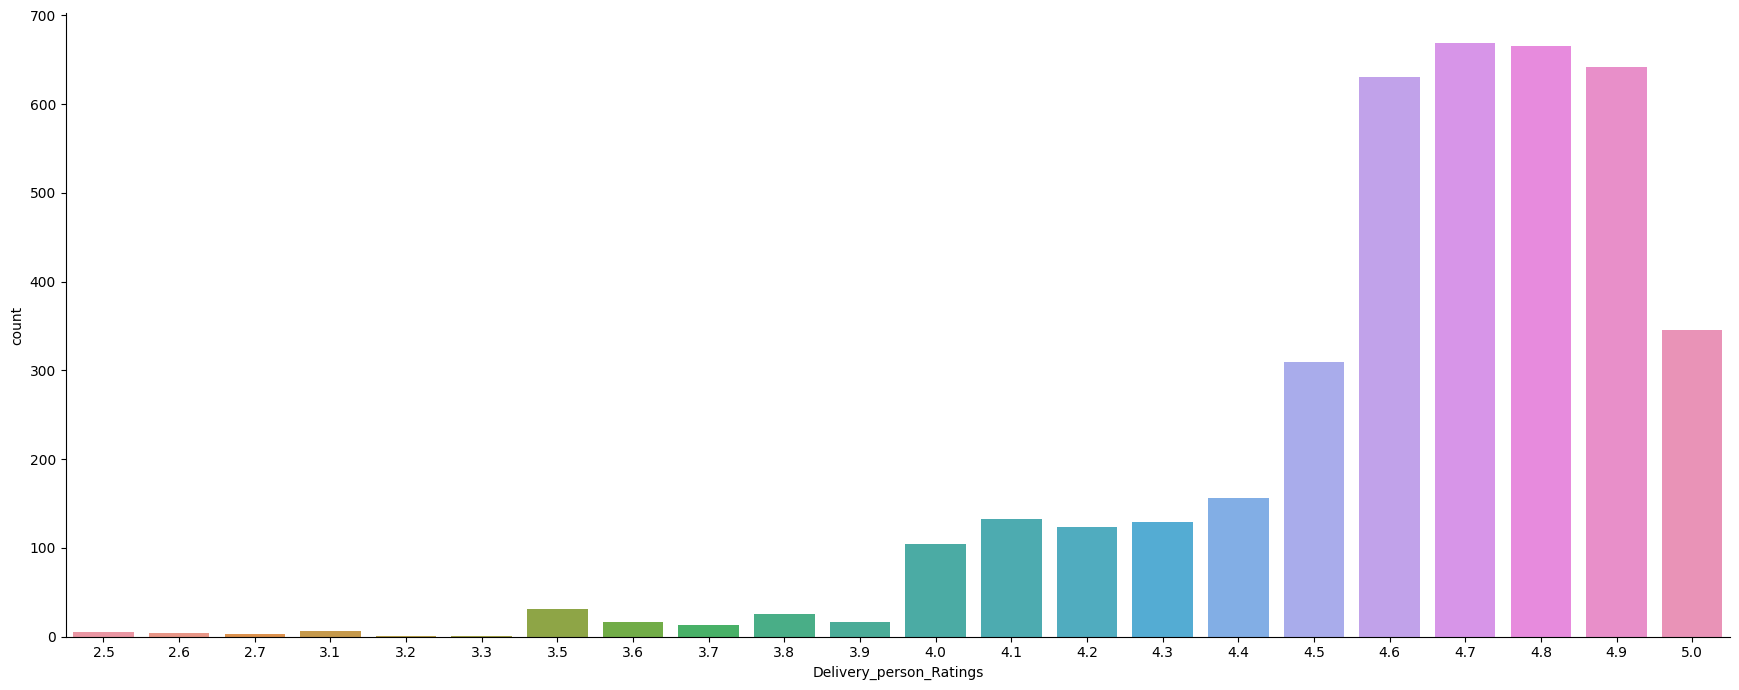

In [199]:
df_aux = df1.Delivery_person_Ratings.value_counts().to_frame().sort_values('Delivery_person_Ratings', ascending=False).reset_index()

sns.catplot(x='Delivery_person_Ratings', y='count', data=df_aux, aspect=2.5,height=7, kind='bar')

#### 4. A avaliação média e o desvio padrão por tipo de tráfego.

#### 5. A avaliação média e o desvio padrão por condições climáticas.

#### 6. Os 10 entregadores mais rápidos por cidade.

#### 7. Os 10 entregadores mais lentos por cidade.